# Stochastische variabelen genereren uit een verdeling naar keuze.

### Literatuurlijst: 
    - https://people.engr.ncsu.edu/hp/files/simulation.pdf
    - https://glowingpython.blogspot.com/2013/01/box-muller-transformation.html 

### Box-Muller Transform 
- u1 = [0,1] random numbers between 0 en 1
- u2 = [0,1] random numbers between 0 en 1

- z1 = (wortel(-2 * lin(u1))) * cos (2*pi*u2) 
- z2 = (wortel(-2 * lin(u1))) * sin (2*pi*u2)

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Random number generator
#### Generator wat gemaakt is in de vorige opdracht "genereren-pseudo-random-getallen/main.py"

In [74]:
"""Generate x random numbers between 0 and 1"""
def pseudo_number_generator(num_steps,previous=10**-10,a=214013,c=2531011,m=2**32):
    x = previous
    lijst = []
    for i in range(num_steps):
        x = (a*x+c)%m
        lijst.append(x)
    return [i/m for i in lijst]

### Box-Muller methode toepassen

In [75]:
"""randomly generated numbers with different seeds so it doesn't get the same result"""
u1 = pseudo_number_generator(100000,previous=435435)
u2 = pseudo_number_generator(100000,previous=435435)

In [81]:
def box_muller(u1,u2):
    z1 = []
    z2 = []
    for i,j in zip(u1,u2):
        z1.append(np.sqrt((-2 * np.log(i))) * np.cos(2 * np.pi * j))
        z2.append(np.sqrt((-2 * np.log(i))) * np.sin(2 * np.pi * j))
    return z1,z2

In [84]:
z1, z2 = box_muller(u1,u2)

### Data plotten

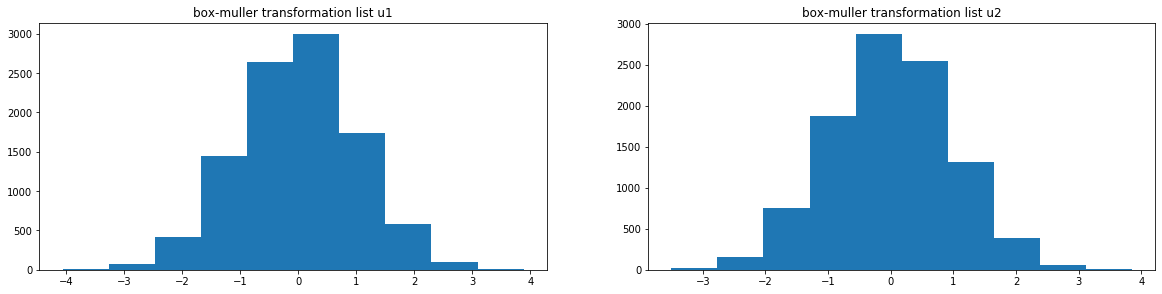

In [95]:
def plot_me(z1,z2):
    plt.figure(figsize=(20,10))

    plt.subplot(221)
    plt.hist(z1)
    plt.title('box-muller transformation list u1')

    plt.subplot(222)
    plt.hist(z2)
    plt.title('box-muller transformation list u2')
    plt.show()

plot_me(z1,z2)

### Test random samples generated with numpy itself 

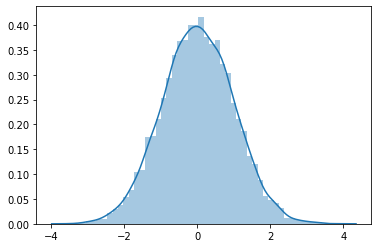

In [94]:
z1, z2 = box_muller(np.random.random_sample(10000), np.random.random_sample(10000))
sns.distplot(z2)